# Viewing images of Varchamp wells
**Author:** Jessica Ewald <br>

The purpose of this script is to query image names by batch, plate, well, site, & channel, download from AWS, and render in a notebook. This will be useful for quick visual sanity checks.

In [1]:
# Imports
import polars as pl
import numpy as np
from sh import aws
import os
from skimage.io import imread
from matplotlib import pyplot as plt
import matplotlib as mpl
import random

from importlib import reload
import displayImages as di
reload(di)

import black
import jupyter_black

jupyter_black.load(
    lab=False,
    line_length=79,
    verbosity="DEBUG",
    target_version=black.TargetVersion.PY310,
)

import warnings
warnings.filterwarnings("ignore")

DEBUG:jupyter_black:config: {'line_length': 79, 'target_versions': {<TargetVersion.PY310: 10>}}


<IPython.core.display.Javascript object>

In [2]:
# Download platemaps - batch 7
aws_path = f"s3://cellpainting-gallery/cpg0020-varchamp/broad/workspace/metadata/2024_01_23_Batch_7/platemap"
dgx_path = f"/dgx1nas1/storage/data/jess/varchamp/platemaps"

B7_plates = ["B7A1R1_P1.txt", "B7A1R1_P2.txt", "B7A1R1_P3.txt", "B7A1R1_P4.txt", "B7A2R1_P1.txt"]
pm = pl.DataFrame()
for plate in B7_plates:
    aws_file = f"{aws_path}/{plate}"
    dgx_file = f"{dgx_path}/{plate}"
    
    aws("s3", "cp", aws_file, dgx_file)
        
    temp_pm = pl.read_csv(dgx_file, separator="\t")
    pm = pl.concat([pm, temp_pm], how="vertical")
        


In [3]:
# Download platemaps - batch 8
aws_path = f"s3://cellpainting-gallery/cpg0020-varchamp/broad/workspace/metadata/2024_02_06_Batch_8/platemap"
dgx_path = f"/dgx1nas1/storage/data/jess/varchamp/platemaps"

B8_plates = ["B8A1R2_P1.txt", "B8A1R2_P2.txt", "B8A1R2_P3.txt", "B8A1R2_P4.txt", "B8A2R2_P1.txt"]
pm = pl.DataFrame()
for plate in B8_plates:
    aws_file = f"{aws_path}/{plate}"
    dgx_file = f"{dgx_path}/{plate}"
    
    aws("s3", "cp", aws_file, dgx_file)
        
    temp_pm = pl.read_csv(dgx_file, separator="\t")
    pm = pl.concat([pm, temp_pm], how="vertical")

downloaded file!


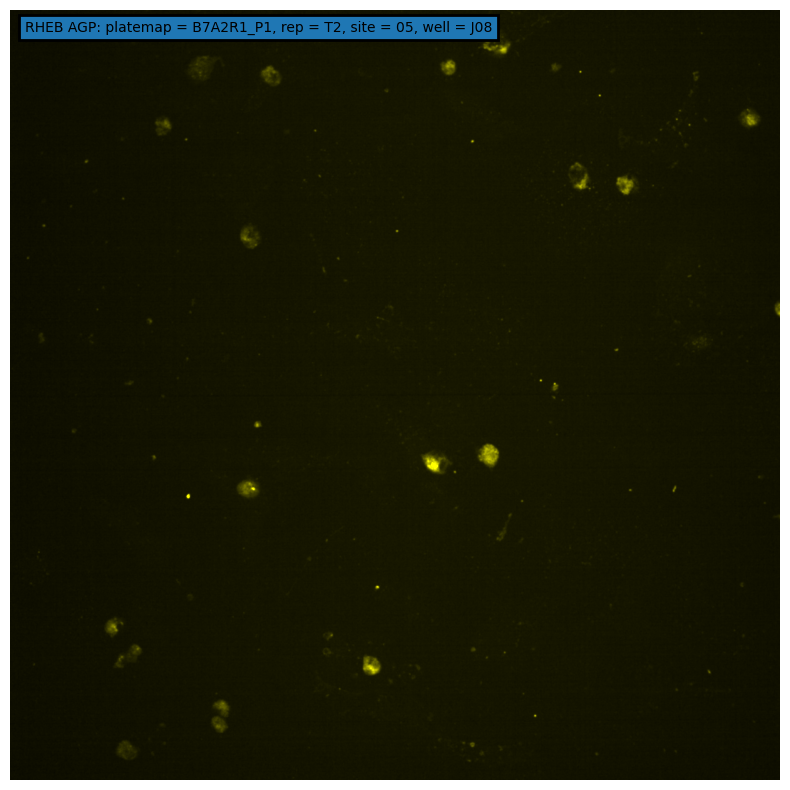

downloaded file!


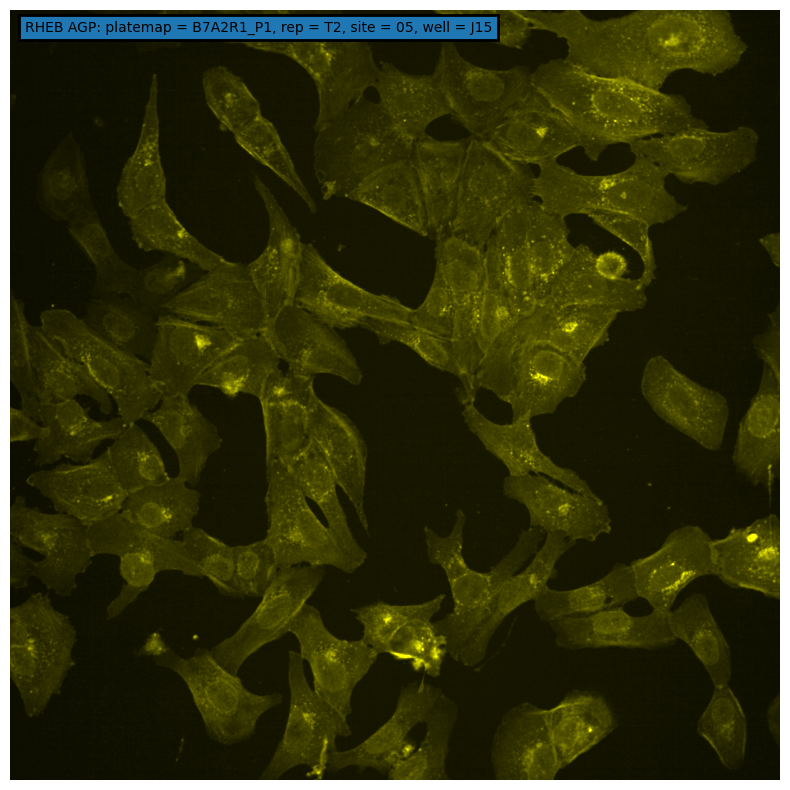

In [3]:
# look at controls
di.plotImages("B7A1R1", "B7A2R1_P1", "05", "J08", "AGP", 99.5, rep= "T2", title="RHEB")
di.plotImages("B7A1R1", "B7A2R1_P1", "05", "J15", "AGP", 99.5, rep= "T2", title="RHEB")

In [5]:
# concatenate all platemaps
pms = ["B7A1R1_P1.txt", "B7A1R1_P2.txt", "B7A1R1_P3.txt", "B7A1R1_P4.txt", "B7A2R1_P1.txt", "B8A1R2_P1.txt", "B8A1R2_P2.txt", "B8A1R2_P3.txt", "B8A1R2_P4.txt", "B8A2R2_P1.txt"]

pm_dfs = []
for pm in pms:
    try:
        temp = pl.read_csv(f"/dgx1nas1/storage/data/jess/varchamp/platemaps/{pm}", separator="\t").select(['plate_map_name', 'well_position', 'control_type', 'gene_allele'])
        pm_dfs.append(temp)
    except Exception as e:
        print("Error reading {pm}: {e}")
    
pm_df = pl.concat(pm_dfs)

downloaded file!


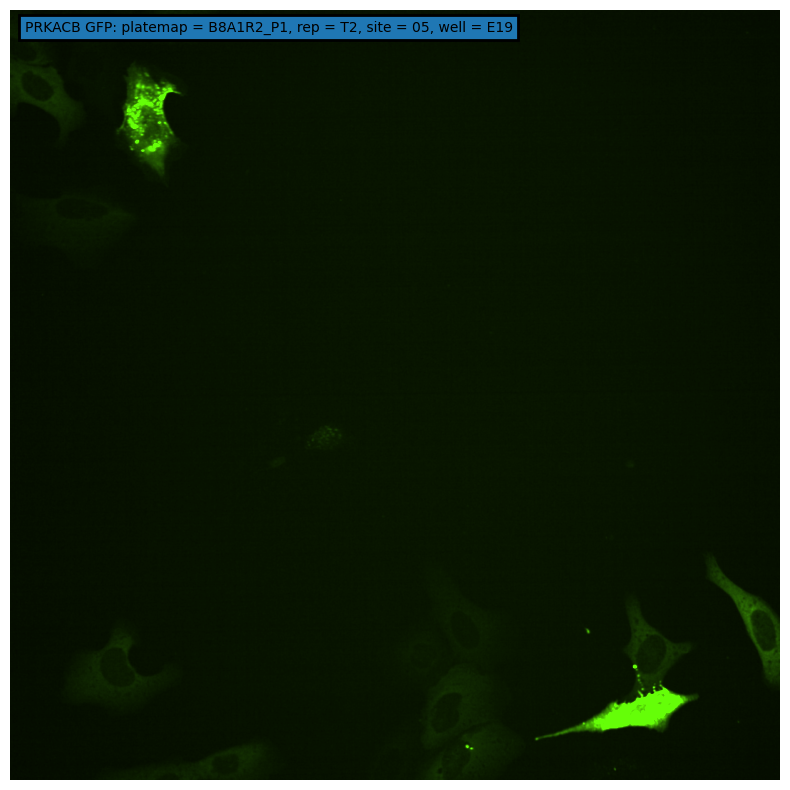

file exists!


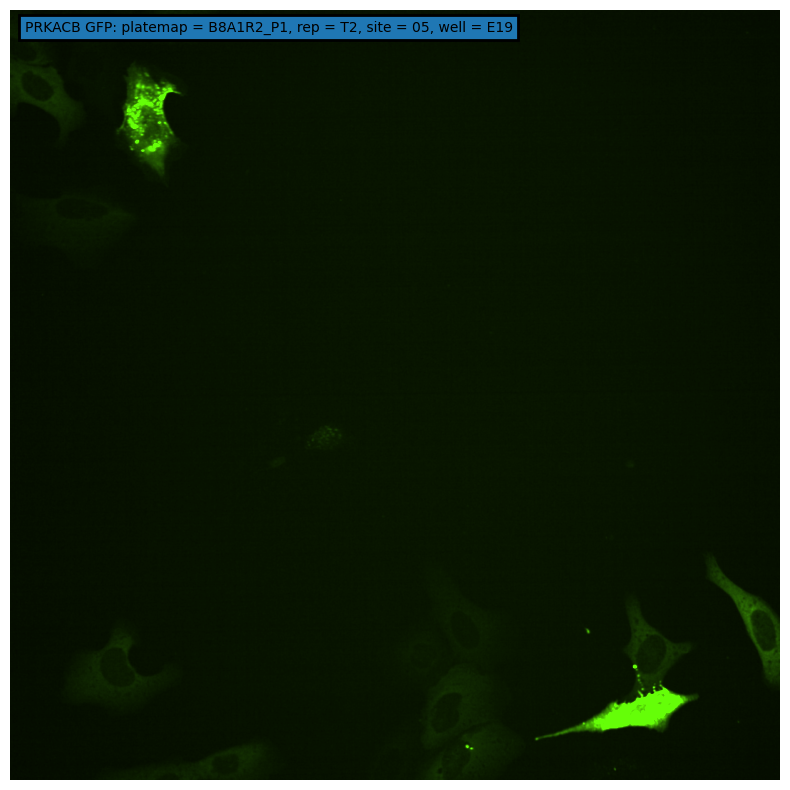

In [13]:
# pm, variant, site, channel, replicate, batch, intensity
di.plotAllele(pm=pm_df, variant="PRKACB", site="05", channel="GFP", replicate="T2", batch="B8A1R2", intensity=99.5)

downloaded file!


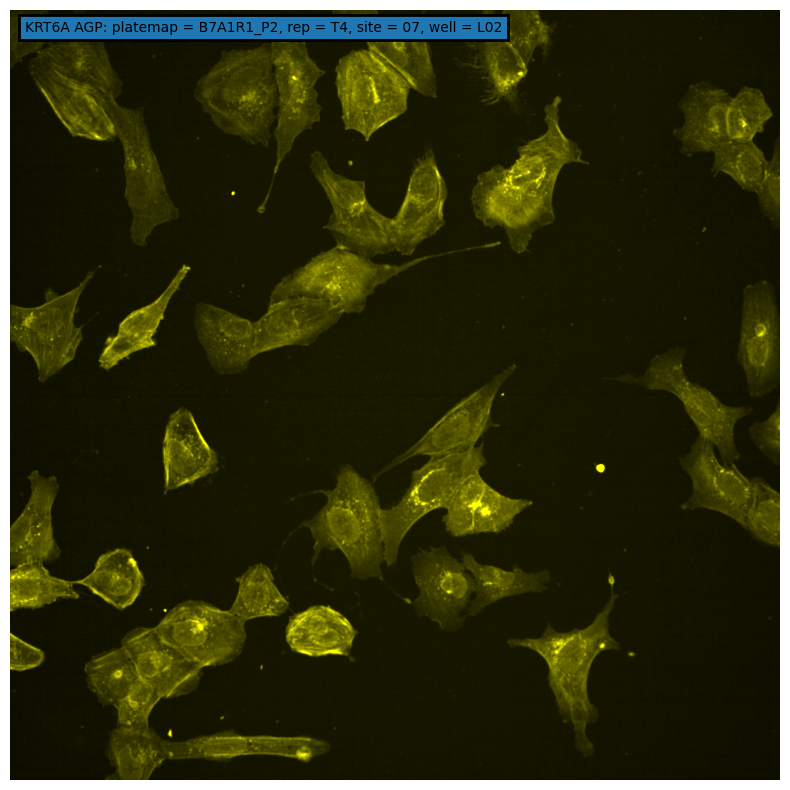

downloaded file!


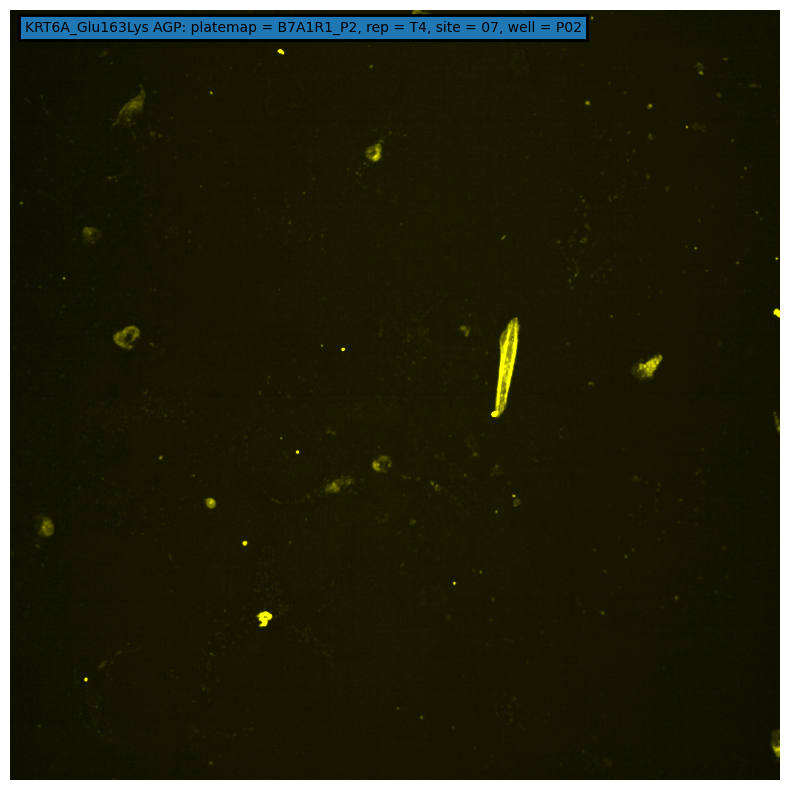

In [96]:
di.plotAllele(pm=pm_df, variant="KRT6A_Glu163Lys", site="07", channel="AGP", replicate="T4", batch="B7A1R1", intensity=99.5)

file exists!


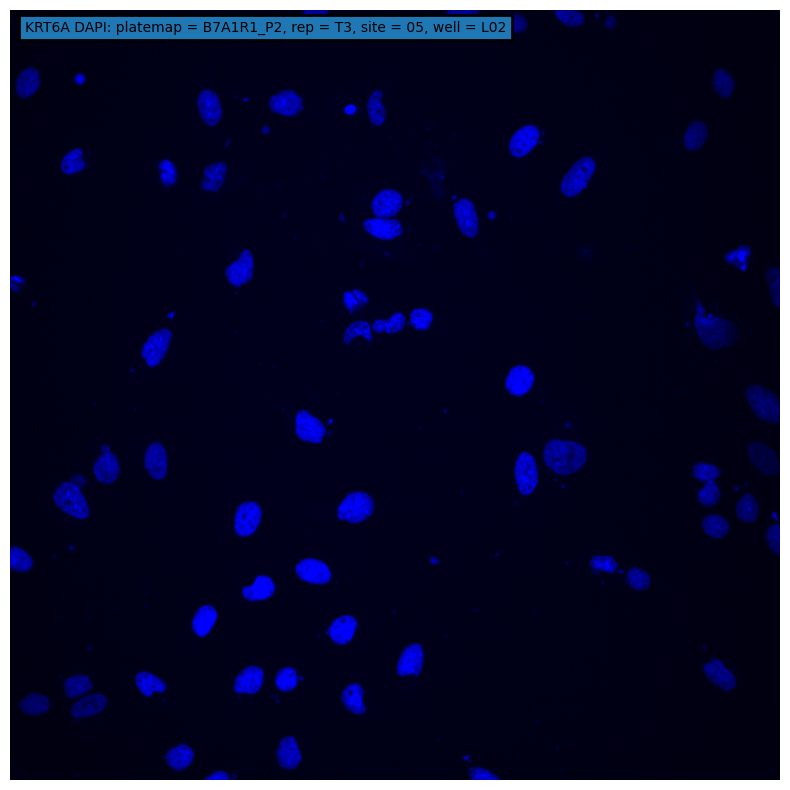

file exists!


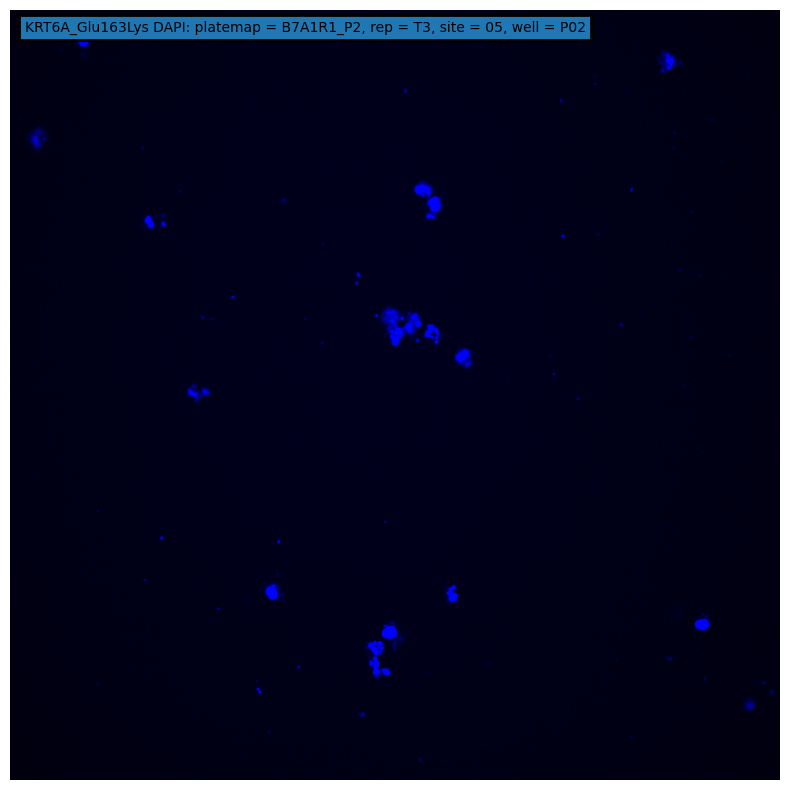

In [71]:
di.plotAllele(pm=pm_df, variant="KRT6A_Glu163Lys", site="05", channel="DAPI", replicate="T3", batch="B7A1R1", intensity=99.5)

file exists!
92
11789


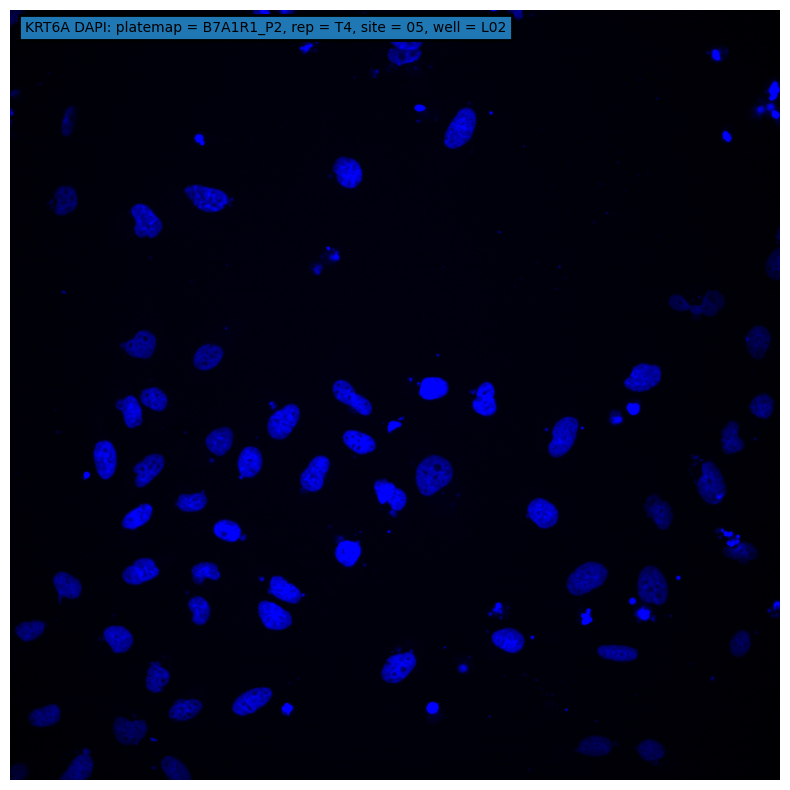

file exists!
90
9180


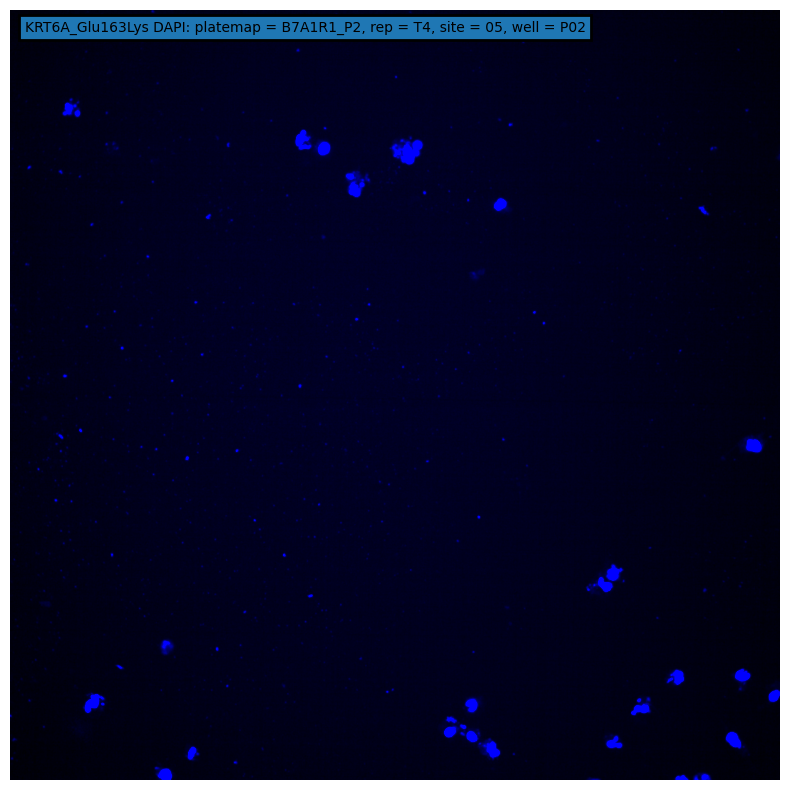

In [50]:
di.plotAllele(pm=pm_df, variant="KRT6A_Glu163Lys", site="05", channel="DAPI", replicate="T4", batch="B7A1R1", intensity=99.5)